In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
olympics = pd.read_csv("Olympics2024.csv")
olympics.head(10)

,Competitions,Rank,NOC,Gold,Silver,Bronze,Total
0,Archery,1,South Korea,5,1,1,7
1,Archery,2,France*,0,1,1,2
2,Archery,3,United States,0,1,1,2
3,Archery,4,China,0,1,0,1
4,Archery,5,Germany,0,1,0,1
5,Archery,6,Mexico,0,0,1,1
6,Archery,7,Turkey,0,0,1,1
7,Artistic swimming,1,China,2,0,0,2
8,Artistic swimming,2,Great Britain,0,1,0,1
9,Artistic swimming,3,United States,0,1,0,1


In [48]:
olympics.describe()


,Gold,Silver,Bronze,Total
count,454.000000,454.000000,454.000000,454.000000
mean,0.724670,0.726872,0.848018,2.299559
std,1.329396,1.228912,1.110370,2.900582
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000
max,14.000000,13.000000,9.000000,34.000000


In [49]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Competitions  454 non-null    object
 1   Rank          454 non-null    object
 2   NOC           454 non-null    object
 3   Gold          454 non-null    int64 
 4   Silver        454 non-null    int64 
 5   Bronze        454 non-null    int64 
 6   Total         454 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 25.0+ KB


Competitions
Archery               15
Artistic swimming      6
Athletics            145
Badminton             15
Basketball            12
Boxing                52
Breaking               6
Canoeing              49
Cycling               66
Diving                24
Equestrian            18
Fencing               36
Field hockey           6
Football               6
Golf                   6
Gymnastics            55
Handball               6
Judo                  60
Modern pentathlon      6
Rowing                42
Rugby sevens           6
Sailing               30
Shooting              45
Skateboarding         12
Sport climbing        12
Surfing                6
Swimming             111
Table tennis          15
Taekwondo             32
Tennis                15
Triathlon              9
Volleyball            12
Water polo             6
Weightlifting         30
Wrestling             72
Name: Total, dtype: int64


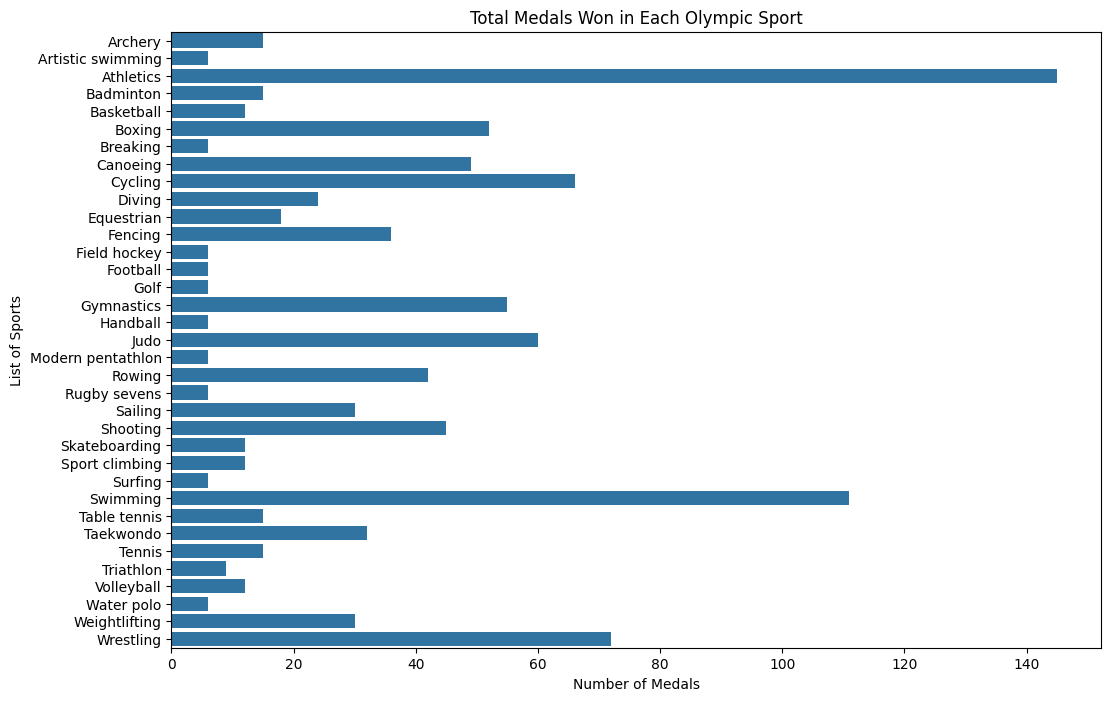

In [50]:
#Q1

medals_by_sports = olympics.groupby('Competitions').agg({'Gold': 'sum','Silver': 'sum','Bronze': 'sum'})
medals_by_sports['Total'] = medals_by_sports[['Gold', 'Silver', 'Bronze']].sum(axis=1)
print(medals_by_sports['Total'])

plt.figure(figsize=(12, 8))
sns.barplot(data=medals_by_sports, y='Competitions', x='Total')
plt.xlabel('Number of Medals')
plt.ylabel('List of Sports')
plt.title('Total Medals Won in Each Olympic Sport')
plt.show()